SESIÓN 9: VISUALIZACIÓN BÁSICA DE DATOS DE POZOS
Laboratorio 1: Visualización de Series Temporales de Producción

OBJETIVO:
Crear visualizaciones efectivas de series temporales para análisis
de tendencias de producción y comunicación de resultados.

CONTEXTO EMPRESARIAL:
Como analista en Meridian Consulting, necesitas generar visualizaciones
que comuniquen claramente las tendencias de producción a los directivos
de las empresas petroleras clientes.

DATOS DISPONIBLES:
- produccion_historica.csv: Datos diarios de producción de 5 pozos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

print("=== LABORATORIO 1: SERIES TEMPORALES DE PRODUCCIÓN ===")
print()

# Configuración inicial
plt.style.use('seaborn-v0_8-whitegrid')
ruta_datos = os.path.join(os.path.dirname('produccion_historica.csv'), '..', 'Datos', 'produccion_historica.csv')

=== LABORATORIO 1: SERIES TEMPORALES DE PRODUCCIÓN ===



PARTE 1: CARGA Y PREPARACIÓN DE DATOS

In [2]:
# PARTE 1: CARGA Y PREPARACIÓN DE DATOS
print("PARTE 1: Carga y preparación de datos")
print("-" * 50)

# TO DO: Cargar el archivo CSV y convertir la columna 'fecha' a datetime
datos = pd.read_csv('Datos/produccion_historica.csv')
datos['fecha'] = pd.to_datetime(datos['fecha'])

# TO DO: Mostrar información básica del dataset
print("Información del dataset:")

# - Número de registros
print(f"Número de registros: {len(datos)}")

# - Pozos únicos
print(f"Número de pozos únicos: {datos['pozo'].nunique()}")

# - Rango de fechas
print(f"Rango de fechas: {datos['fecha'].min().date()} a {datos['fecha'].max().date()}")

# - Primeras 10 filas
print("\nPrimeras 5 filas del dataset:")
print(datos.head(5))

print("\n" + "="*50 + "\n")

PARTE 1: Carga y preparación de datos
--------------------------------------------------
Información del dataset:
Número de registros: 75
Número de pozos únicos: 5
Rango de fechas: 2024-01-01 a 2024-01-15

Primeras 5 filas del dataset:
       fecha        pozo  barriles_diarios  presion_psi  temperatura_f  \
0 2024-01-01  POZO-A-001              1250         2850            185   
1 2024-01-01  POZO-A-002               980         2720            182   
2 2024-01-01  POZO-B-001              1580         3100            190   
3 2024-01-01  POZO-B-002               850         2650            178   
4 2024-01-01  POZO-C-001              1100         2900            186   

   api_gravity  
0         32.5  
1         31.8  
2         33.2  
3         30.9  
4         32.1  




PARTE 2: VISUALIZACIÓN BÁSICA DE SERIE TEMPORAL

PARTE 2: Serie temporal de un pozo individual
--------------------------------------------------




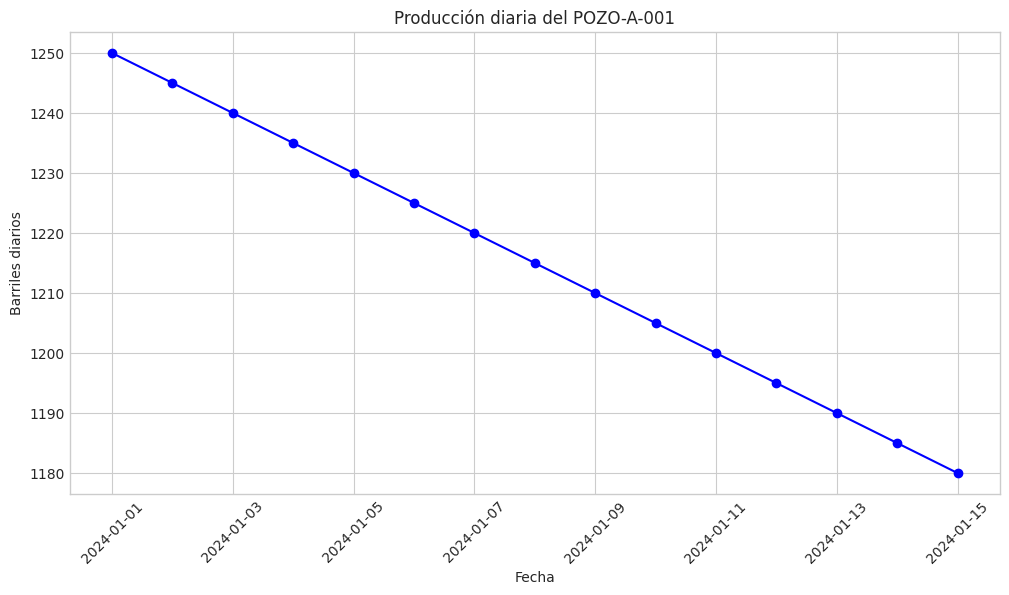

In [29]:
# PARTE 2: VISUALIZACIÓN BÁSICA DE SERIE TEMPORAL
print("PARTE 2: Serie temporal de un pozo individual")
print("-" * 50)

# TO DO: Crear un gráfico de línea mostrando la producción del POZO-A-001. Requisitos:

# - Filtrar los datos para el pozo A-001
pozo_a001 = datos[datos['pozo'] == 'POZO-A-001']
#print(pozo_a001)

# - Tamaño de figura: 12x6
plt.figure(figsize=(12, 6))

# - Graficar la producción a lo largo del tiempo
plt.plot(pozo_a001['fecha'], pozo_a001['barriles_diarios'], marker='o', linestyle='-', color='blue')

# - Título descriptivo
plt.title('Producción diaria del POZO-A-001')

# - Etiquetas en los ejes
plt.xlabel('Fecha')
plt.ylabel('Barriles diarios')

# - Formato de fecha legible en el eje X
plt.xticks(rotation=45)

# - Grid activado
plt.grid(True)

print("\n" + "="*50 + "\n")

PARTE 3: COMPARACIÓN DE MÚLTIPLES POZOS

PARTE 3: Comparación de producción entre pozos
--------------------------------------------------




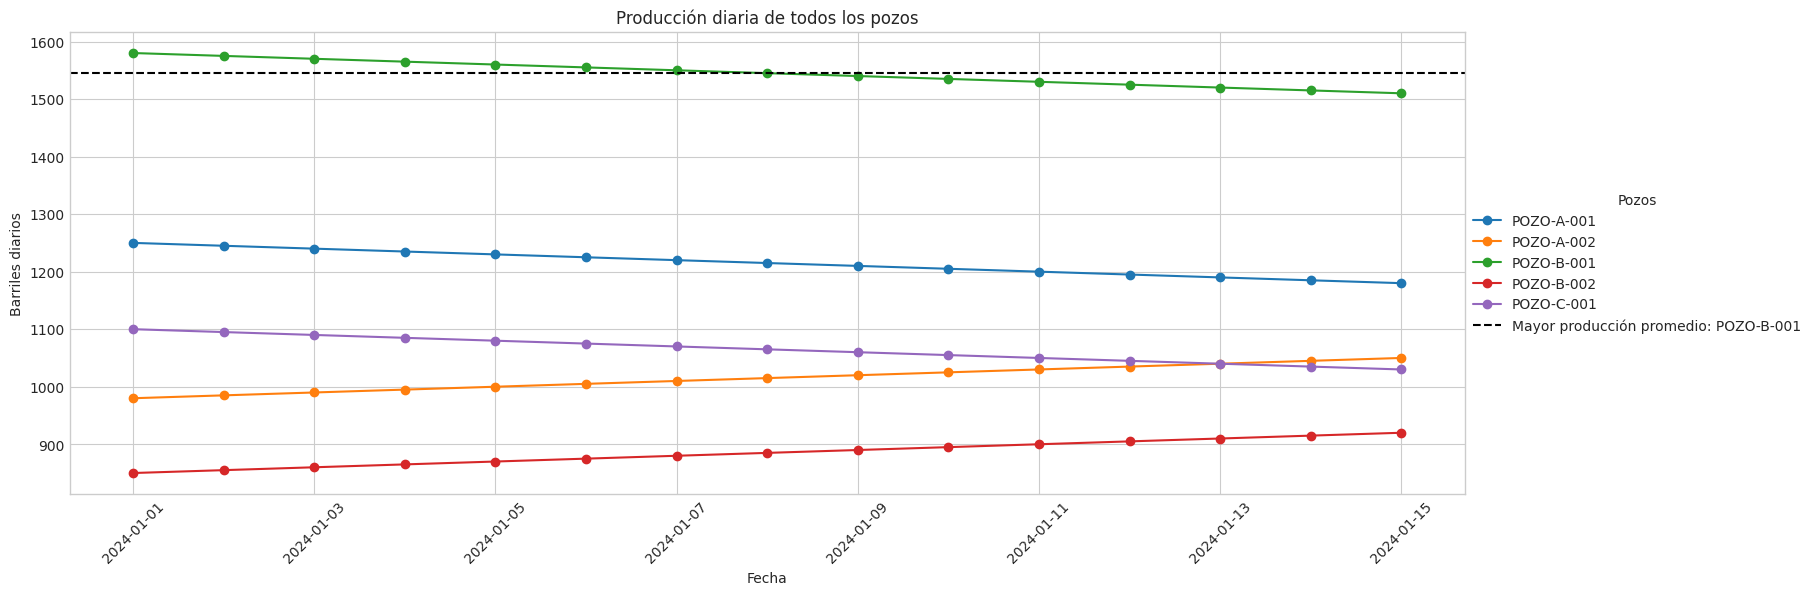

In [27]:
# PARTE 3: COMPARACIÓN DE MÚLTIPLES POZOS
print("PARTE 3: Comparación de producción entre pozos")
print("-" * 50)

# TO DO: Crear un gráfico comparando la producción de todos los pozos. # Requisitos:

# - Tamaño de figura: 12x6
plt.figure(figsize=(18, 6)) 

# - Graficar la producción de cada pozo
for pozo in datos['pozo'].unique():
    pozo_data = datos[datos['pozo'] == pozo]
    plt.plot(pozo_data['fecha'], pozo_data['barriles_diarios'], marker='o', linestyle='-', label=pozo)

# - Título descriptivo
plt.title('Producción diaria de todos los pozos')

# - Etiquetas en los ejes
plt.xlabel('Fecha')
plt.ylabel('Barriles diarios')

# - Formato de fecha legible en el eje X
plt.xticks(rotation=45)

# - Leyenda para identificar los pozos
plt.legend(title='Pozos')

# - Grid activado
plt.grid(True)

# - Destacar el pozo con mayor producción promedio
produccion_promedio = datos.groupby('pozo')['barriles_diarios'].mean().idxmax()
plt.axhline(y=datos[datos['pozo'] == produccion_promedio]['barriles_diarios'].mean(), color='black', linestyle='--', label=f'Mayor producción promedio: {produccion_promedio}')
plt.legend(title='Pozos', loc='center right', bbox_to_anchor=(1.25, 0.5))    

print("\n" + "="*50 + "\n")


 PARTE 4: ANÁLISIS DE TENDENCIAS

PARTE 4: Análisis de tendencias con media móvil
--------------------------------------------------




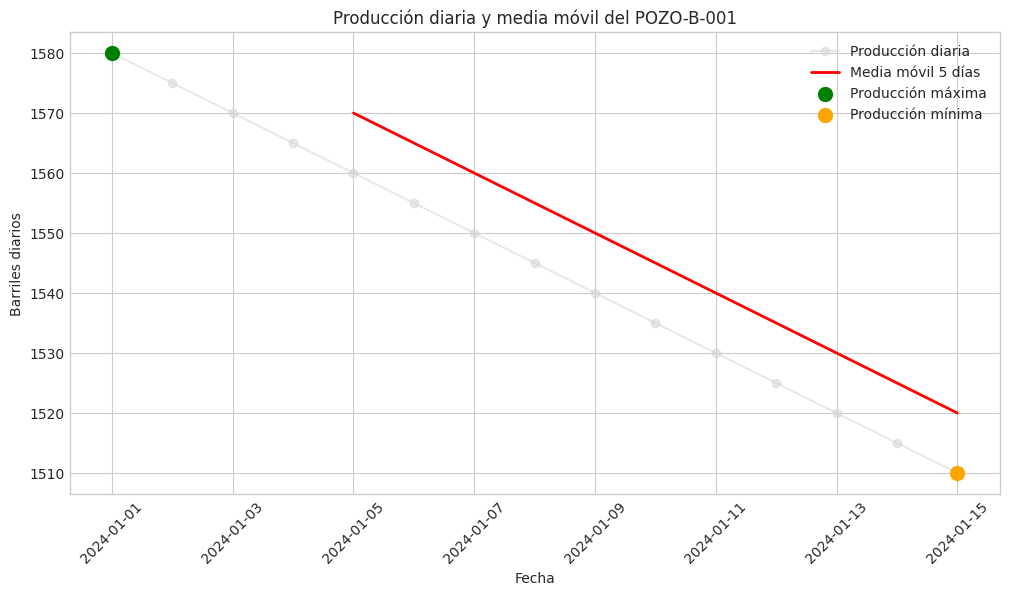

In [28]:
# PARTE 4: ANÁLISIS DE TENDENCIAS
print("PARTE 4: Análisis de tendencias con media móvil")
print("-" * 50)

# TO DO: Para el POZO-B-001:

# 1. Graficar la producción diaria (línea delgada, con transparencia)
pozo_b001 = datos[datos['pozo'] == 'POZO-B-001']
plt.figure(figsize=(12, 6))
plt.plot(pozo_b001['fecha'], pozo_b001['barriles_diarios'], marker='o', linestyle='-', color='lightgray', alpha=0.5, label='Producción diaria')

# 2. Calcular y graficar la media móvil de 5 días (línea gruesa)   
media_movil = pozo_b001['barriles_diarios'].rolling(window=5).mean()
plt.plot(pozo_b001['fecha'], media_movil, color='red', linewidth=2, label='Media móvil 5 días')

# 3. Identificar y marcar el punto de producción máxima
maximo = pozo_b001.loc[pozo_b001['barriles_diarios'].idxmax()]
plt.scatter(maximo['fecha'], maximo['barriles_diarios'], color='green', s=100, zorder=5, label='Producción máxima')

# 4. Identificar y marcar el punto de producción mínima
minimo = pozo_b001.loc[pozo_b001['barriles_diarios'].idxmin()]
plt.scatter(minimo['fecha'], minimo['barriles_diarios'], color='orange', s=100, zorder=5, label='Producción mínima')

# 5. Título descriptivo
plt.title('Producción diaria y media móvil del POZO-B-001')

# 6. Etiquetas en los ejes
plt.xlabel('Fecha')
plt.ylabel('Barriles diarios')

# 7. Formato de fecha legible en el eje X
plt.xticks(rotation=45)

# 8. Leyenda para identificar los elementos
plt.legend()

# 9. Grid activado
plt.grid(True)

print("\n" + "="*50 + "\n")


PARTE 5: DASHBOARD DE PRODUCCIÓN

PARTE 5: Dashboard integrado de producción
--------------------------------------------------




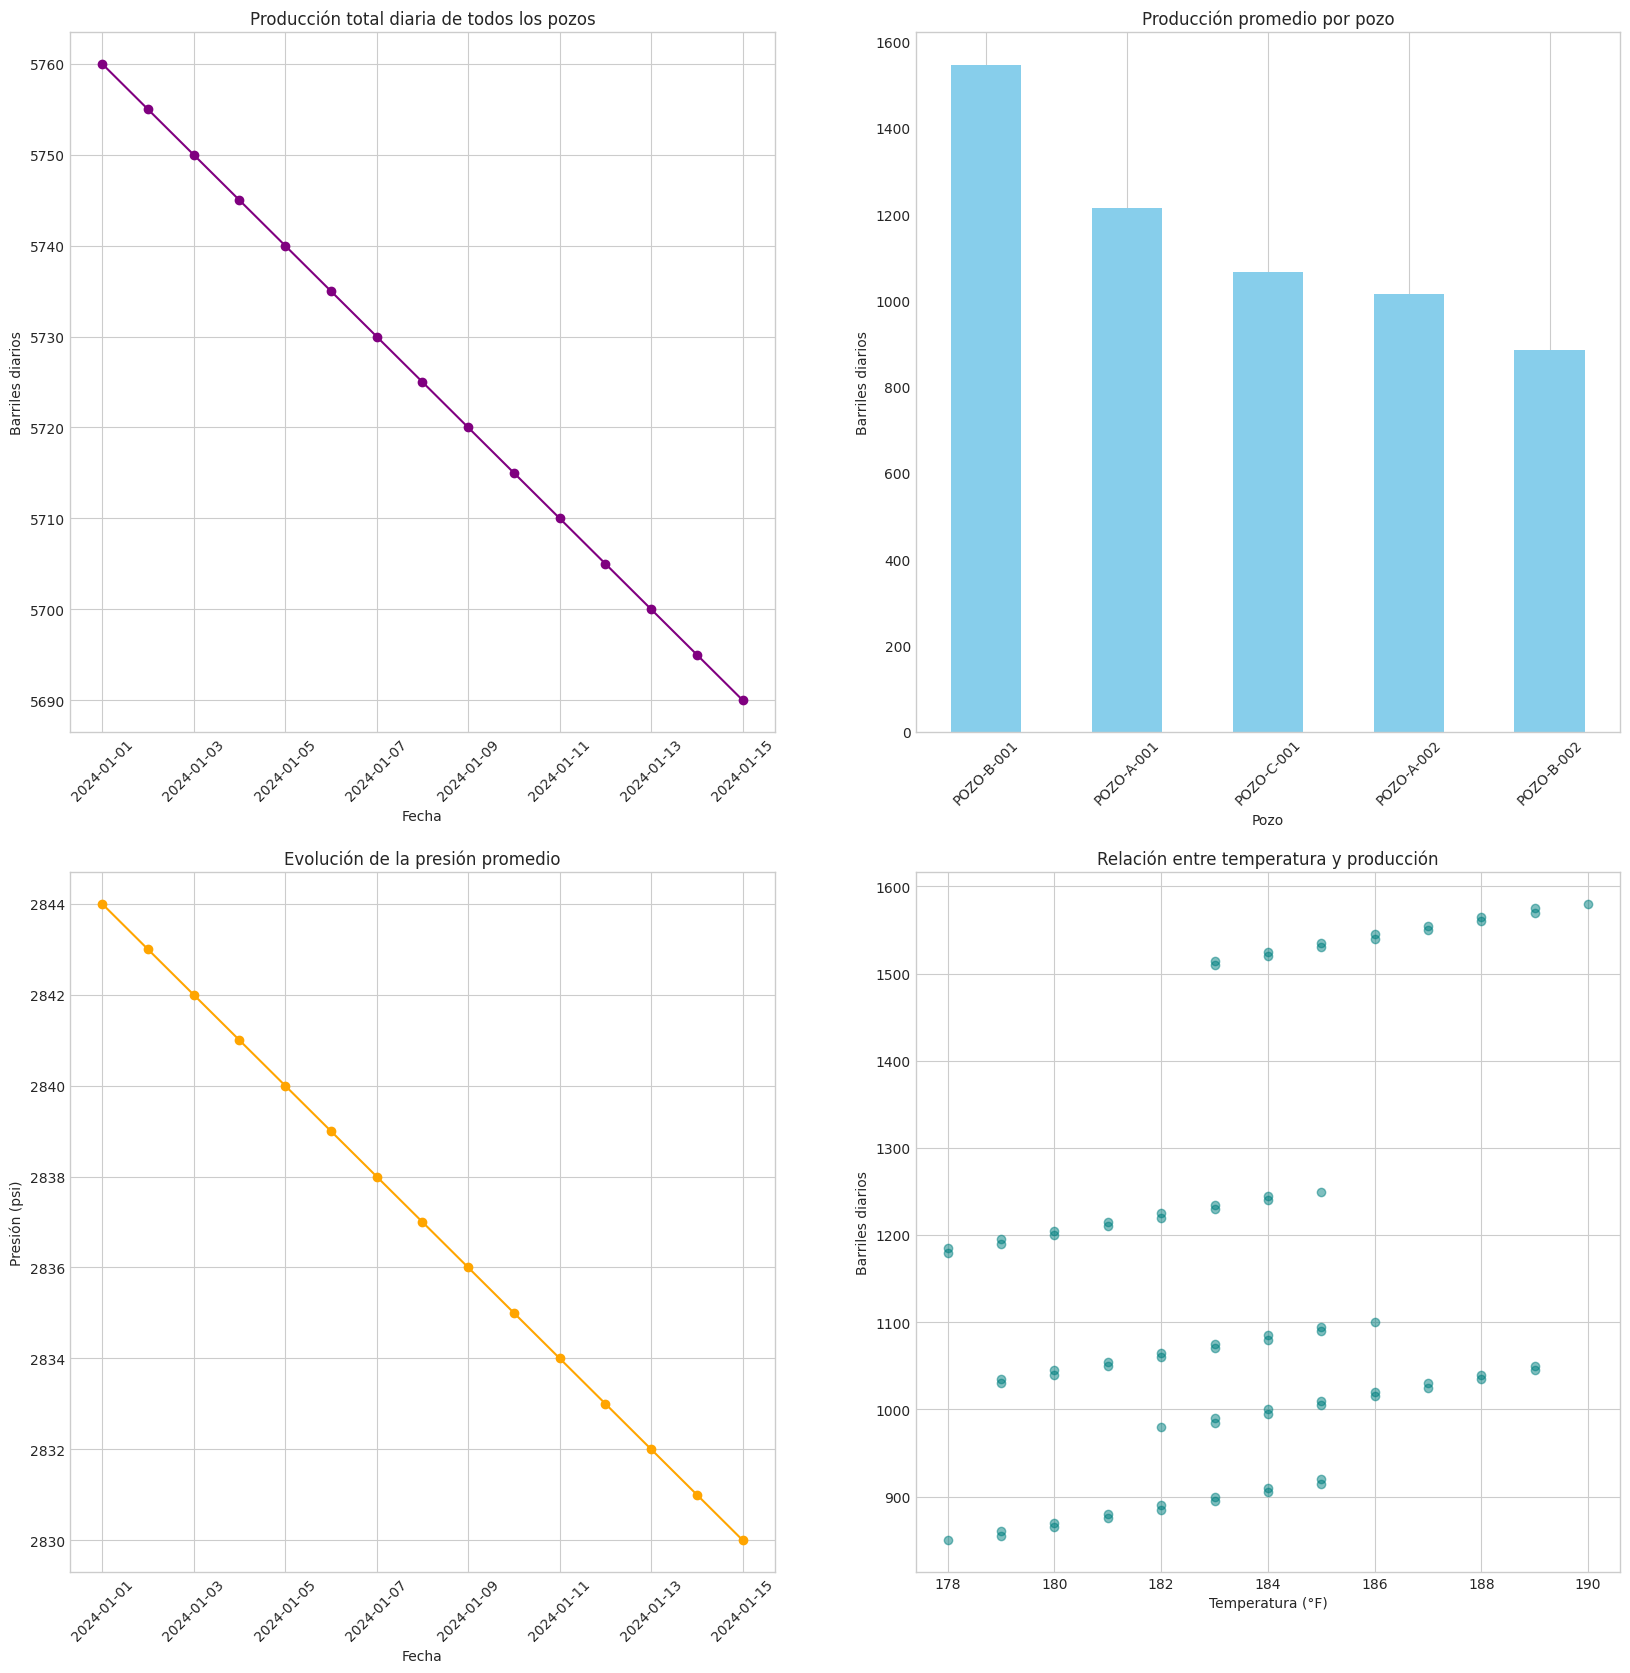

In [36]:
print("PARTE 5: Dashboard integrado de producción")
print("-" * 50)

# TO DO: Crear un dashboard con 4 subplots:

# 1. Superior izquierda: Producción total diaria (suma de todos los pozos)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
produccion_total = datos.groupby('fecha')['barriles_diarios'].sum()
plt.plot(produccion_total.index, produccion_total.values, marker='o', linestyle='-', color='purple')
plt.title('Producción total diaria de todos los pozos')
plt.xlabel('Fecha')
plt.ylabel('Barriles diarios')
plt.xticks(rotation=45)
plt.grid(True)

# 2. Superior derecha: Producción promedio por pozo (gráfico de barras)
plt.subplot(2, 2, 2)
produccion_promedio_por_pozo = datos.groupby('pozo')['barriles_diarios'].mean().sort_values(ascending=False)
produccion_promedio_por_pozo.plot(kind='bar', color='skyblue')
plt.title('Producción promedio por pozo')
plt.xlabel('Pozo')
plt.ylabel('Barriles diarios')
plt.xticks(rotation=45)
plt.grid(axis='y')

# 3. Inferior izquierda: Evolución de la presión promedio
plt.subplot(2, 2, 3)
presion_promedio = datos.groupby('fecha')['presion_psi'].mean()
plt.plot(presion_promedio.index, presion_promedio.values, marker='o', linestyle='-', color='orange')
plt.title('Evolución de la presión promedio')
plt.xlabel('Fecha')
plt.ylabel('Presión (psi)')
plt.xticks(rotation=45)
plt.grid(True)

# 4. Inferior derecha: Relación temperatura vs producción (scatter plot)
plt.subplot(2, 2, 4)
plt.scatter(datos['temperatura_f'], datos['barriles_diarios'], alpha=0.5, color='teal')
plt.title('Relación entre temperatura y producción')
plt.xlabel('Temperatura (°F)')
plt.ylabel('Barriles diarios')
plt.grid(True)

print("\n" + "="*50 + "\n")

PARTE 6: VISUALIZACIÓN PARA REPORTE EJECUTIVO

In [ ]:
print("PARTE 6: Gráfico profesional para reporte")
print("-" * 50)

# TO DO: Crear una visualización profesional que muestre:

# 1. Producción acumulada por campo (CAMPO-A, CAMPO-B, CAMPO-C)

pozo_a001 = datos[datos['pozo'] == 'POZO-A-001']
ventas_ordenadas['ingresos_acumulados'] = ventas_ordenadas['ingresos_netos'].cumsum()
datos['campo'] = datos['campo'].unique()
produccion_acumulada = datos.groupby(['campo', 'fecha'])['barriles_diarios'].sum().unstack(level=0).cumsum()


PARTE 6: Gráfico profesional para reporte
--------------------------------------------------


KeyError: 'campo'